# Regresión logística

In [1]:
import pandas as pd

# Cargar los datos
jugadores_df = pd.read_csv('../data/jugadores_limpio.csv')
overall_df = pd.read_csv('../data/overall_limpio.csv')

# Visualizar las primeras filas de cada DataFrame para entender su estructura
jugadores_df_head = jugadores_df.head()
overall_df_head = overall_df.head()

jugadores_df_head, overall_df_head

(   Temporada  #            Jugador        País   Posc           Equipo  Edad  \
 0  2017-2018  1  Vincent Aboubakar     Camerún     DL            Porto  25.0   
 1  2017-2018  2       Marcos Acuña   Argentina  DL,DF      Sporting CP  25.0   
 2  2017-2018  3   Tosin Adarabioyo  Inglaterra     DF  Manchester City  19.0   
 3  2017-2018  4            Adriano      Brasil     DF         Beşiktaş  32.0   
 4  2017-2018  5       Luiz Adriano      Brasil  DL,CC   Spartak Moscow  30.0   
 
    Nacimiento  PJ  Titular  ...  Gls90.  Ast90  G+A90  G-TP90  G+A-TP90  xG90  \
 0      1992.0   6      6.0  ...    0.91   0.36   1.27    0.91      1.27  0.51   
 1      1991.0   5      5.0  ...    0.00   0.21   0.21    0.00      0.21  0.00   
 2      1997.0   2      1.0  ...    0.00   0.00   0.00    0.00      0.00  0.00   
 3      1984.0   6      5.0  ...    0.00   0.00   0.00    0.00      0.00  0.01   
 4      1987.0   6      6.0  ...    0.17   0.00   0.17    0.17      0.17  0.16   
 
    xAG90  xG+xAG9

In [2]:
# Paso 1: Preprocesamiento de Datos

# Convertir la columna de la fase alcanzada en una variable objetivo binaria
# Consideramos "W" y "F" como alcanzar la final (1), y cualquier otro resultado como 0.
overall_df['Reached_Final'] = overall_df['Rk'].apply(lambda x: 1 if x in ['W', 'F'] else 0)

# Seleccionar características relevantes para el modelo
features = ['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
target = 'Reached_Final'

# Verificamos si hay valores faltantes en las características seleccionadas y en la variable objetivo
missing_values = overall_df[features + [target]].isnull().sum()

# Visualizar el resultado de la transformación y los valores faltantes
overall_df[['Season', 'Squad'] + features + [target]].head(), missing_values


(      Season            Squad    MP    W    D    L    GF    GA    GD   Pts  \
 0  2022-2023  Manchester City  13.0  8.0  5.0  0.0  32.0   5.0  27.0  29.0   
 1  2022-2023            Inter  13.0  7.0  3.0  3.0  19.0  11.0   8.0  24.0   
 2  2022-2023      Real Madrid  12.0  8.0  2.0  2.0  26.0  13.0  13.0  26.0   
 3  2022-2023            Milan  12.0  5.0  3.0  4.0  15.0  11.0   4.0  18.0   
 4  2022-2023    Bayern Munich  10.0  8.0  1.0  1.0  22.0   6.0  16.0  25.0   
 
    Reached_Final  
 0              1  
 1              1  
 2              0  
 3              0  
 4              0  ,
 MP               0
 W                0
 D                0
 L                0
 GF               0
 GA               0
 GD               0
 Pts              0
 Reached_Final    0
 dtype: int64)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(overall_df[features], overall_df[target], test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades de la clase positiva

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Lo mostramos
print(f'accuracy: {accuracy}')
print(f'conf_matrix: {conf_matrix}')
print(f'roc_auc: {roc_auc}')

accuracy: 0.9635416666666666
conf_matrix: [[179   3]
 [  4   6]]
roc_auc: 0.9807692307692307


**Precisión:** 96.35%, lo que indica que el modelo es bastante preciso en la clasificación de los equipos según si alcanzaron la final o no.

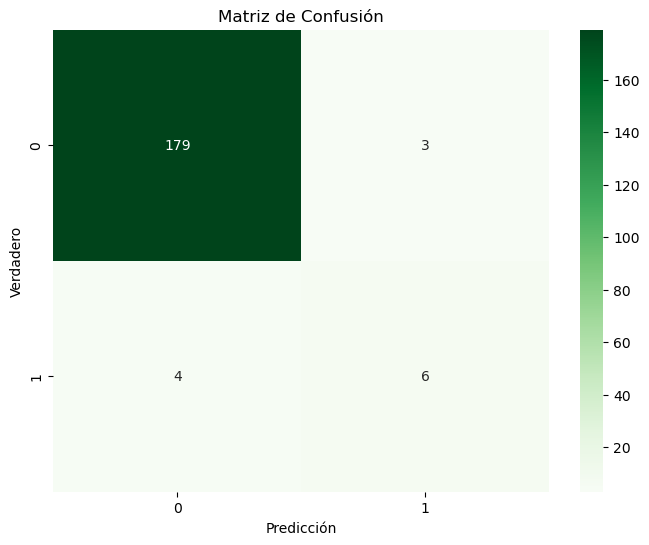

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", ax=ax)
ax.set_xlabel('Predicción')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
plt.show()

Matriz de Confusión:

* 179 equipos correctamente clasificados como no finalistas.
* 6 equipos correctamente clasificados como finalistas.
* 3 equipos incorrectamente clasificados como finalistas cuando no lo eran.
* 4 equipos incorrectamente clasificados como no finalistas cuando sí alcanzaron la final.

In [5]:
# Cargar los datos de los equipos para la temporada actual
equipo_2023_2024_df = pd.read_csv('../data/equipo_2023-2024_limpio.csv')

# Visualizar las primeras filas para verificar la estructura de los datos
equipo_2023_2024_df.head()

,Season,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Last 5,Attendance,Top Team Scorer,Goalkeeper,Top Team Scorer Goals,Country
0,2023-2024,QF,Manchester City,8.0,8.0,0.0,0.0,24.0,9.0,15.0,24.0,WWWDW,"51,047",Erling Haaland,Ederson,6,England
1,2023-2024,QF,Real Madrid,8.0,7.0,1.0,0.0,18.0,8.0,10.0,22.0,WDDWW,"70,851",Jude Bellingham,"Kepa Arrizabalaga,Andriy Lunin",4,Spain
2,2023-2024,QF,Bayern Munich,8.0,6.0,1.0,1.0,15.0,7.0,8.0,19.0,WDWWW,"75,000",Harry Kane,Manuel Neuer,6,Germany
3,2023-2024,QF,Atlético Madrid,8.0,5.0,2.0,1.0,19.0,8.0,11.0,17.0,LWLWL,"63,844",Antoine Griezmann,Jan Oblak,6,Spain
4,2023-2024,QF,Arsenal,8.0,5.0,1.0,2.0,17.0,5.0,12.0,16.0,LWWWW,"59,782",Gabriel Jesus,David Raya,4,England


In [6]:
# Predecir las probabilidades de alcanzar la final para los equipos de la temporada 2023-2024
equipo_2023_2024_df['Probabilidad_Final'] = model.predict_proba(equipo_2023_2024_df[features])[:, 1]

# Ordenar los equipos por la probabilidad de alcanzar la final y mostrar los resultados
predicciones_2023_2024 = equipo_2023_2024_df[['Squad', 'Probabilidad_Final']].sort_values(by='Probabilidad_Final', ascending=False)
predicciones_2023_2024

,Squad,Probabilidad_Final
0,Manchester City,5.488173e-03
1,Real Madrid,2.146416e-03
2,Bayern Munich,7.113287e-04
3,Atlético Madrid,5.985685e-04
4,Arsenal,4.126035e-04
5,Barcelona,2.882319e-04
6,Dortmund,2.096162e-04
9,Inter,1.757607e-04
8,Porto,1.687459e-04
7,Paris S-G,1.251207e-04


Las probabilidades de alcanzar la final de la Champions League para la temporada 2023-2024, según nuestro modelo y basadas en el rendimiento hasta la fecha, son las siguientes para algunos equipos destacados:

1. Manchester City: 0.55%
2. Real Madrid: 0.21%
3. Bayern Munich: 0.071%
4. Atlético Madrid: 0.060%
5. Arsenal: 0.041%

Las probabilidades parecen bastante bajas para todos los equipos, lo que podría deberse a cómo el modelo interpreta las estadísticas del rendimiento de la temporada actual en relación con los datos históricos sobre los cuales fue entrenado. Esto podría indicar una necesidad de ajustar el modelo o reconsiderar las características utilizadas para la predicción debido a cambios en el formato de la competición, el nivel de competencia, o simplemente las diferencias en el rendimiento de los equipos entre temporadas.

Si bien estas probabilidades pueden parecer contraintuitivas a primera vista, es importante recordar que el modelo se basa en datos históricos y podría no reflejar completamente la dinámica única de la temporada actual

# Mejorar el modelo


In [7]:
# Paso 1: Preprocesamiento de Datos

# Convertir la columna de la fase alcanzada en una variable objetivo binaria
# Consideramos "W" y "F" como alcanzar la final (1), y cualquier otro resultado como 0.
overall_df['Reached_Final'] = overall_df['Rk'].apply(lambda x: 1 if x in ['W', 'F'] else 0)

# Seleccionar características relevantes para el modelo
features = ['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
target = 'Reached_Final'

# Verificamos si hay valores faltantes en las características seleccionadas y en la variable objetivo
missing_values = overall_df[features + [target]].isnull().sum()

# Visualizar el resultado de la transformación y los valores faltantes
overall_df[['Season', 'Squad'] + features + [target]].head(), missing_values

X_train, X_test, y_train, y_test = train_test_split(overall_df[features], overall_df[target], test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# Suponiendo que X_train, X_test, y_train, y_test ya están definidos

# Definir el pipeline y los parámetros para la búsqueda en grid
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

# Crear y ajustar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Realizar predicciones y evaluar el mejor modelo
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Mejores Parámetros:", best_params)
print("Precisión:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)
print("AUC-ROC:", roc_auc)



Mejores Parámetros: {'logisticregression__C': 100, 'logisticregression__solver': 'liblinear'}
Precisión: 0.96875
Matriz de Confusión:
 [[179   3]
 [  3   7]]
AUC-ROC: 0.9857142857142858


**Mejora precisión**: Como vemos la precisión del modelo ha mejorado alcanzando un 96,86% de predecir si equipo alcanza final o no

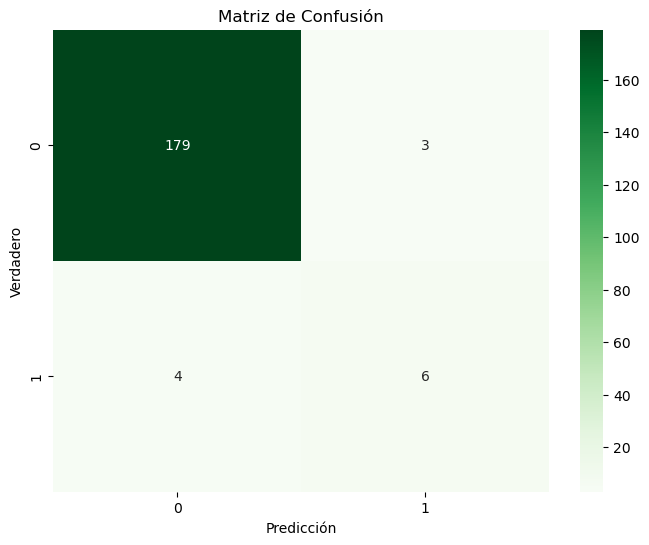

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Graficar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", ax=ax)
ax.set_xlabel('Predicción')
ax.set_ylabel('Verdadero')
ax.set_title('Matriz de Confusión')
plt.show()

Matriz de Confusión:

* 179 equipos correctamente clasificados como no finalistas.
* 7 equipos correctamente clasificados como finalistas.
* 3 equipos incorrectamente clasificados como finalistas cuando no lo eran.
* 3 equipos incorrectamente clasificados como no finalistas cuando sí alcanzaron la final.

In [9]:
# Predecir las probabilidades de alcanzar la final para los equipos de la temporada 2023-2024
equipo_2023_2024_df['Probabilidad_Final'] = best_model.predict_proba(equipo_2023_2024_df[features])[:, 1]

# Ordenar los equipos por la probabilidad de alcanzar la final y mostrar los resultados
predicciones_2023_2024 = equipo_2023_2024_df[['Squad', 'Probabilidad_Final']].sort_values(by='Probabilidad_Final', ascending=False)
predicciones_2023_2024

,Squad,Probabilidad_Final
0,Manchester City,3.272895e-03
1,Real Madrid,1.131926e-03
4,Arsenal,6.332594e-04
2,Bayern Munich,5.561427e-04
3,Atlético Madrid,5.352886e-04
5,Barcelona,3.380797e-04
8,Porto,2.719609e-04
6,Dortmund,1.709555e-04
7,Paris S-G,1.261487e-04
9,Inter,1.231153e-04


Las probabilidades de alcanzar la final de la Champions League para la temporada 2023-2024 calculadas por el modelo mejorado son las siguientes para algunos equipos destacados:

1. Manchester City: 0.327%
2. Real Madrid: 0.113%
3. Arsenal: 0.063%
4. Bayern Munich: 0.056%
5. Atlético Madrid: 0.054%

Estas probabilidades indican que, según el modelo mejorado, Manchester City tiene la mayor probabilidad de alcanzar la final, seguido por Real Madrid, Arsenal, Bayern Munich, y Atlético Madrid. Aunque estas probabilidades pueden parecer bajas, reflejan la competitividad y la incertidumbre inherente a la Champions League, especialmente en las etapas tempranas de la competición.

Estos resultados ofrecen una visión basada en el análisis estadístico del rendimiento de los equipos hasta la fecha en la temporada actual. Es importante tener en cuenta que estas probabilidades son estimaciones basadas en datos históricos y rendimiento actual, y pueden cambiar a medida que avanza la competición y se disponga de más información.

# Árbol de decisión


In [14]:
# Importamos todas las libreriasa necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [15]:
# Cargar los datos de equipos y jugadores
overall_df = pd.read_csv('../data/overall_limpio.csv') 
jugadores_df = pd.read_csv('../data/jugadores_limpio.csv')

In [16]:
# Preparamos los datos para el modelo
player_stats_summary = jugadores_df.groupby(['Temporada', 'Equipo']).agg(
    Total_Goals=('Gls.', 'sum'),  
    Total_Assists=('Ast90', 'mean'),  
    Total_xG=('xG90', 'mean'),
    Total_xA=('xAG90', 'mean')
).reset_index()